# Day 3: Data analysis with Pandas



1.   Introduction: Data frames & explorative data analysis (accessing/selecting data)
2.   Clean data, views vs copies
3.   GroupBy
4.   Sorting & combining data





Kieran Didi

<div>
<img src="https://github.com/kdidi99/Python_for_Biochemists/blob/main/images/workflow-wickham.png?raw=1" />
</div>

<div>
<img src="https://github.com/kdidi99/Python_for_Biochemists/blob/main/images/numpy.jpg?raw=1", width = 300 />
</div>

<div>
<img src="https://github.com/kdidi99/Python_for_Biochemists/blob/main/images/pandas.jpg?raw=1", width = 400 />
</div>

<div>
<img src="https://github.com/kdidi99/Python_for_Biochemists/blob/main/images/matplotlib.jpg?raw=1", width = 400 />
</div>

## 1. Introduction: The Data Frame

<div>
<img src="https://github.com/kdidi99/Python_for_Biochemists/blob/main/images/01_table_dataframe.svg?raw=1" />
</div>

### Advantages of data frames:

*   Easy to use
*   Pandas library fast & supports complex operations
*   De facto standard for data analysis



1st step: download some data

In [1]:
import requests

download_url = "https://raw.githubusercontent.com/rashida048/Datasets/master/titanic_data.csv"
target_csv_path = "titanic_data.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")


Download ready.


2nd step: use pandas to load data

In [2]:
import pandas as pd
df_titanic = pd.read_csv("titanic_data.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_titanic.head(5) #prints the first five rows of the data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Accessing columns of data frame with square brackets:

In [4]:
df_titanic["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

## Excursion: python series and data frames

Think:

Python list = Pandas series <br>
Python dictionary = Pandas series with custom index <br>
Python list of list = Pandas data frame

In [5]:
#list: proteins = [10, 1333, 1104, 2283]
proteins = pd.Series([10, 1333, 1104, 2283])
proteins

#dictionary
proteins = pd.Series([10, 1333, 1104, 2283], index = ["Mut1", "Mut2", "Mut3", "WT"])
proteins = pd.Series({"Mut1": 10, "Mut2": 1333, "Mut3": 1104, "WT": 2283})#create it with dictionary syntax
proteins

#list of list
l = [["Mut1", 10, "C142G", "denatured"],
    ["Mut2", 1333, "C142S", "globular"],
    ["Mut3", 1104, "H86R", "globular"],
    ["WT", 2283, None, "globular"]]
df_proteins = pd.DataFrame(l, columns = ["name", "activity", "mutation", "shape"])
df_proteins
df_proteins = df_proteins.set_index('name')
df_proteins

,activity,mutation,shape
name,,,
Mut1,10,C142G,denatured
Mut2,1333,C142S,globular
Mut3,1104,H86R,globular
WT,2283,None,globular


3rd step: Do some explorative analysis of your data

In [6]:
type(df_titanic) #type of object
len(df_titanic) #number of rows
df_titanic.shape #shape attribute of data frame, rows&columns
df_titanic.info() #data types contained in data frame
df_titanic.describe() #first statistics

#we need numpy to get statistics for object columns
import numpy as np
df_titanic.describe(include=object)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Why are there only 204 cabin values but 891 names? Let's look closer...

In [7]:
df_titanic["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Are there rows without cabin value?

In [8]:
df_titanic["Cabin"].isnull().sum()

687

Are those the missing cabin values?

In [9]:
891-687

204

We can access columns in a data frame in different ways: 

In [10]:
df_proteins
df_proteins["activity"] #indexing operator subsets dataframe into list
df_proteins.activity #same output with dot-notation, just use this for test purposes!
df_proteins["shape"] #delivers output as desired
df_proteins.shape #coincides with DataFrame attribute shape
df_proteins

,activity,mutation,shape
name,,,
Mut1,10,C142G,denatured
Mut2,1333,C142S,globular
Mut3,1104,H86R,globular
WT,2283,None,globular


We can also select rows with the so-called **accessors** (loc and iloc):

In [11]:
df_proteins.loc["WT"] #accessing rows by index label using loc
df_proteins.iloc[2] #accessing rows by index position using iloc
df_proteins.loc["Mut1":"Mut3"] #selecting multiple entries with colon notation
df_proteins.loc["Mut1":"Mut3", "activity"] #selecting rows and columns by index label
#same with iloc?
df_proteins.iloc[0:3, 0] #selecting based on row and column index position; 2 not included!

name
Mut1      10
Mut2    1333
Mut3    1104
Name: activity, dtype: int64

Select data based on boolean expressions:

In [ ]:
high_activity = df_proteins[df_proteins["activity"] > 100] #only include rows above activity threshold
high_activity
mutants = df_proteins[df_proteins["mutation"].notna()]
mutants
mutants142 = mutants[mutants["mutation"].str.contains("142")]
mutants142
low_act_142 = mutants[(mutants["mutation"].str.contains("142")) & (mutants["activity"] < 100)] #combine conditions, need paranthesis!
low_act_142 #what happens if we use | instead?

,activity,mutation,shape
name,,,
Mut1,10,C142G,denatured


Basic plotting (either directly in Pandas or using Matplotlib/Seaborn):

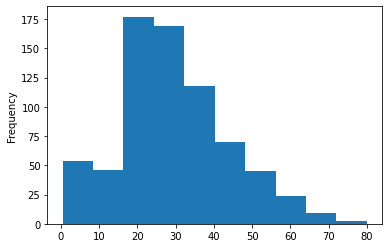

In [17]:
df_titanic["Age"].plot(kind= "hist")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


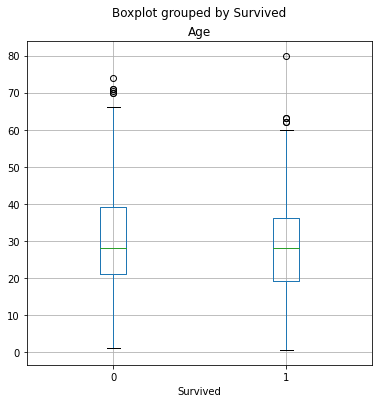

In [29]:
df_titanic.boxplot(column="Age", by="Survived", figsize=(6,6))

.plot() is just a wrapper for plt.plot() from Matplotlib, but makes your life easier when working with DataFrames.